In [1]:
!mkdir plots

mkdir: cannot create directory `plots': File exists


In [2]:
%matplotlib inline
import pandas as pd
from os import listdir
from os.path import join
from scipy import stats
import matplotlib.pyplot as plt
from statistics import mean, stdev
import numpy as np
import random
# import matplotlib.gridspec as? gridspec

In [3]:
stats.spearmanr([2,3,1], [2,1,3])

SpearmanrResult(correlation=-1.0, pvalue=0.0)

In [4]:
input_path = "../data/synoymsWithoutIncExcRelevancySorted"

In [5]:
files = listdir(input_path)
files

['hypertension safe treatments_page_rank.csv',
 'constipation safe treatments_page_rank.csv',
 'treating people already having hypertension_page_rank.csv',
 'safe treatments for asthma_pageRank.csv',
 'recommended anti-platelet doses for treating Coronary artery disease_page_rank_103.csv',
 'dietary approaches for obesity treatment_page_rank.csv',
 'haemorrhage cure_page_rank.csv',
 'antiretroviral therapy first time_pageRank.csv',
 'Dietary Therapy Epilepsies_page_rank.csv',
 'low back pain therapy workout_pageRank.csv',
 'Treating Anemia, Iron-Deficiency in CKD patients_page_rank_15.csv',
 'postoperative delirium_pageRank.csv',
 'out of hospital cardiac arrest_page_rank.csv',
 'safe treatment for Alzheimer disease_page_rank.csv',
 'managing constipation in children_pageRank.csv',
 'Hypercholesterolemia safe treatments_page_rank.csv',
 'serious sleep apnea_page_rank.csv',
 'serious Rheumatoid arthritis_pageRank.csv',
 'Outcomes of cerebrovascular accident_page_rank.csv',
 'HIV infecti

In [6]:
def cal_rank_given_index_list(index_list):
    rank = 1
    rank_list = [0 for item in range(len(index_list))]
    for item in index_list:
        rank_list[item] = rank
        rank += 1
    return rank_list

In [7]:
spearman_val_relevance_adversity = []
spearman_val_relevancy_recency = []
spearman_val_relevancy_popularity_sum = []

spearman_val_adversity_recency = []
spearman_val_adversity_popularity_sum = []

spearman_val_recency_popularity_sum = []

p_val_relevance_adversity = []
p_val_relevancy_recency = []
p_val_relevancy_popularity_sum = []

p_val_adversity_recency = []
p_val_adversity_popularity_sum = []

p_val_recency_popularity_sum = []

for file in files:
    print(file)
    
    df = pd.read_csv(join(input_path, file))
    
    df['tot_subj_affected'] = df['tot_subj_affected'].fillna(value=0)
    df['citationSum'] = df['citationSum'].fillna(value=0)
    
#     relevancy_value = df.briefTitleAndSummaryCombinedPageRankScore.values
#     popularity_value_sum = df.citationSum.values
#     popularity_value_avg = df.citationAvg.values
#     recency_value = df.CompletionDate.values
    
    rel_index = df.sort_values(by=['brief_summary_matched_count', 'official_title_matched_count', 'brief_title_matched_count', 'briefTitleAndSummaryCombinedPageRankScore'], ascending=[False, False, False, False]).index.tolist()
    
    df_a = df.sample(frac=1.0, random_state=1)
    adv_index = df_a.sort_values(by=['tot_subj_affected'], ascending=[False]).index.tolist()
    
    
    rec_index = df.sort_values(by=['CompletionDate'], ascending=[False]).index.tolist()
    pop_sum_index = df.sort_values(by=['citationSum'], ascending=[False]).index.tolist()
    
    print("Relevancy Index:", rel_index)
    print("Adversity Index:", adv_index)
    print("Recency Index:", rec_index)
    print("Popularity Index:", pop_sum_index)
    
    
    rel_rank_list = cal_rank_given_index_list(rel_index)
    adv_rank_list = cal_rank_given_index_list(adv_index)
    rec_rank_list = cal_rank_given_index_list(rec_index)
    pop_sum_rank_list = cal_rank_given_index_list(pop_sum_index)
#     print(pop_avg_rank_list)
    
    spearman_val_relevance_adversity.append(stats.spearmanr(rel_rank_list, adv_rank_list)[0])
    p_val_relevance_adversity.append(stats.spearmanr(rel_rank_list, adv_rank_list)[1])
    spearman_val_relevancy_recency.append(stats.spearmanr(rel_rank_list, rec_rank_list)[0])
    p_val_relevancy_recency.append(stats.spearmanr(rel_rank_list, rec_rank_list)[1])
    spearman_val_relevancy_popularity_sum.append(stats.spearmanr(rel_rank_list, pop_sum_rank_list)[0])
    p_val_relevancy_popularity_sum.append(stats.spearmanr(rel_rank_list, pop_sum_rank_list)[1])
    
    spearman_val_adversity_recency.append(stats.spearmanr(adv_rank_list, rec_rank_list)[0])
    p_val_adversity_recency.append(stats.spearmanr(adv_rank_list, rec_rank_list)[1])
    spearman_val_adversity_popularity_sum.append(stats.spearmanr(adv_rank_list, pop_sum_rank_list)[0])
    p_val_adversity_popularity_sum.append(stats.spearmanr(adv_rank_list, pop_sum_rank_list)[1])
    
    spearman_val_recency_popularity_sum.append(stats.spearmanr(rec_rank_list, pop_sum_rank_list)[0])
    p_val_recency_popularity_sum.append(stats.spearmanr(rec_rank_list, pop_sum_rank_list)[1])

hypertension safe treatments_page_rank.csv
Relevancy Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
Adversity Index: [41, 13, 14, 6, 11, 7, 1, 27, 32, 35, 4, 42, 18, 25, 28, 3, 16, 20, 15, 5, 9, 8, 12, 43, 0, 39, 38, 23, 30, 21, 22, 19, 34, 33, 44, 17, 26, 31, 29, 36, 40, 24, 10, 2, 37]
Recency Index: [29, 33, 21, 25, 42, 37, 43, 44, 31, 27, 39, 8, 32, 26, 20, 23, 16, 15, 22, 10, 1, 7, 36, 2, 41, 34, 24, 12, 14, 13, 6, 28, 38, 0, 11, 30, 35, 4, 18, 9, 5, 19, 40, 17, 3]
Popularity Index: [5, 9, 34, 31, 14, 7, 13, 6, 38, 10, 30, 23, 44, 2, 42, 25, 18, 37, 16, 27, 41, 15, 39, 40, 28, 19, 36, 3, 12, 1, 20, 35, 24, 11, 43, 22, 29, 21, 17, 4, 33, 32, 26, 8, 0]
constipation safe treatments_page_rank.csv
Relevancy Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Adversity Index: [7, 5, 10, 2, 3, 4, 1, 6, 0, 12, 9, 8, 11]
Recency Index: [5, 12, 9, 7, 8, 10, 11, 6, 

Treating Anemia, Iron-Deficiency in CKD patients_page_rank_15.csv
Relevancy Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Adversity Index: [9, 10, 8, 11, 6, 0, 3, 2, 1, 7, 4, 13, 14, 12, 5]
Recency Index: [9, 5, 3, 4, 7, 11, 10, 8, 6, 2, 1, 12, 13, 0, 14]
Popularity Index: [12, 6, 8, 2, 10, 1, 7, 13, 3, 14, 5, 11, 0, 4, 9]
postoperative delirium_pageRank.csv
Relevancy Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
Adversity Index: [33, 13, 36, 6, 3, 41, 20, 18, 25, 28, 7, 1, 26, 16, 0, 15, 5, 11, 9, 8, 12, 42, 38, 27, 2, 24, 40, 17, 30, 22, 32, 19, 21, 34, 29, 35, 31, 39, 4, 23, 14, 10, 37]
Recency Index: [22, 5, 11, 37, 41, 4, 35, 13, 2, 36, 29, 34, 28, 7, 39, 23, 12, 3, 42, 21, 9, 6, 33, 1, 16, 38, 20, 17, 18, 25, 40, 14, 19, 30, 26, 8, 24, 32, 15, 0, 27, 10, 31]
Popularity Index: [39, 24, 27, 36, 26, 30, 15, 32, 20, 0, 40, 13, 2, 19, 31, 33, 8, 29, 6

Relevancy Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Adversity Index: [8, 1, 3, 2, 4, 10, 6, 0, 7, 11, 9, 5]
Recency Index: [3, 0, 2, 6, 1, 10, 8, 9, 5, 11, 4, 7]
Popularity Index: [4, 11, 3, 5, 10, 8, 9, 1, 2, 0, 6, 7]
malnutrition in young children_page_rank.csv
Relevancy Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
Adversity Index: [2, 42, 27, 38, 20, 18, 25, 6, 28, 13, 7, 3, 26, 16, 0, 15, 5, 11, 9, 8, 12, 43, 1, 39, 10, 44, 30, 21, 22, 41, 19, 35, 34, 33, 32, 14, 23, 17, 31, 29, 36, 40, 4, 24, 37]
Recency Index: [18, 0, 4, 23, 40, 11, 34, 36, 25, 26, 29, 42, 5, 28, 43, 32, 13, 41, 17, 2, 30, 14, 21, 31, 3, 38, 19, 6, 12, 8, 16, 22, 27, 20, 10, 15, 35, 37, 7, 24, 33, 1, 44, 39, 9]
Popularity Index: [44, 5, 39, 22, 1, 24, 3, 21, 9, 33, 14, 29, 12, 31, 2, 37, 28, 13, 10, 19, 6, 35, 20, 30, 0, 8, 17, 36, 27, 26, 11, 16, 41, 43, 42, 7, 38, 4, 15, 32, 1

In [8]:
fig = plt.figure(figsize=(20,30))
gs = plt.GridSpec(6, 2)

<Figure size 1440x2160 with 0 Axes>

In [9]:
def plotAndSaveFigure(x, y, saveFileName, fig, row):

    # Calculate the simple average of the data
    y_mean = [np.mean(y)]*len(x)
    
    ax = fig.add_subplot(gs[row,0])
    
    #set title
#     ax.title.set_text(saveFileName)
    ax.set_title(saveFileName)
    
    # Plot the data
    data_line = ax.plot(x,y, label='Data', marker='o')

    # Plot the average line
    mean_line = ax.plot(x,y_mean, label='Mean', linestyle='--')

    # Make a legend
    legend = ax.legend(loc='best')
    
    ax.set_ylim((-1,1))
    fig.show()
#     plt.show()
#     fig.savefig(saveFileName, dpi=1000)
    print("Mean:", round(y_mean[0], 2))
    print("Standard Deviation:", round(stdev(y), 2))

In [10]:
def plotPValue(x, y, saveFileName, fig, row):

    # Calculate the simple average of the data
    y_mean = [np.mean(y)]*len(x)
    ax = fig.add_subplot(gs[row,1])
    
    #set title
    ax.title.set_text(saveFileName)
    
    # Plot the data
    data_line = ax.plot(x,y, label='Data', marker='o')

    # Plot the average line
    mean_line = ax.plot(x,y_mean, label='Mean', linestyle='--')

    # Make a legend
    legend = ax.legend(loc='best')
    
    ax.set_ylim((0,1))
    fig.show()
    print("Mean:", round(y_mean[0], 2))
    print("Standard Deviation:", round(stdev(y), 2))

In [11]:
row = 0
plotAndSaveFigure(range(1,26), spearman_val_relevance_adversity, "Spearman's Rank-Order Correlation Between Relevancy And Adversity", fig, row)
plotPValue(range(1,26), p_val_relevance_adversity, "p values Between Relevancy And Adversity", fig, row)

Mean: 0.14
Standard Deviation: 0.24
Mean: 0.29
Standard Deviation: 0.27


/home/mt1/17CS60R70/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


In [12]:
row = 1
plotAndSaveFigure(range(1,26), spearman_val_relevancy_recency, "Spearman's Rank-Order Correlation Between Relevancy And Recency", fig, row)
plotPValue(range(1,26), p_val_relevancy_recency, "p value between Relevancy And Recency", fig, row)

Mean: -0.04
Standard Deviation: 0.27
Mean: 0.47
Standard Deviation: 0.36


In [13]:
row = 2
plotAndSaveFigure(range(1,26), spearman_val_relevancy_popularity_sum, "Spearman's Rank-Order Correlation Between Relevancy And Popularity Sum", fig, row)
plotPValue(range(1,26), p_val_relevancy_popularity_sum, "p value between Relevancy And Popularity Sum", fig, row)

Mean: 0.11
Standard Deviation: 0.28
Mean: 0.36
Standard Deviation: 0.32


In [14]:
row = 3
plotAndSaveFigure(range(1,26), spearman_val_adversity_recency, "Spearman's Rank-Order Correlation Between Adversity And Recency", fig, row)
plotPValue(range(1,26), p_val_adversity_recency, "p value between Adversity And Recency", fig, row)

Mean: 0.03
Standard Deviation: 0.2
Mean: 0.5
Standard Deviation: 0.33


In [15]:
# print(len(spearman_val_adversity_popularity_sum))
row = 4
plotAndSaveFigure(range(1,26), spearman_val_adversity_popularity_sum, "Spearman's Rank-Order Correlation Between Adversity And Popularity Sum", fig, row)
plotPValue(range(1,26), p_val_adversity_popularity_sum, "p value between Adversity And Popularity Sum", fig, row)

Mean: 0.12
Standard Deviation: 0.18
Mean: 0.38
Standard Deviation: 0.34


In [16]:
row = 5
plotAndSaveFigure(range(1,26), spearman_val_recency_popularity_sum, "Spearman's Rank-Order Correlation Between Recency And Popularity Sum", fig, row)
plotPValue(range(1,26), p_val_recency_popularity_sum, "p value Between Recency And Popularity Sum", fig, row)

Mean: -0.41
Standard Deviation: 0.17
Mean: 0.09
Standard Deviation: 0.15


In [17]:
fig.savefig("spearmanPvalueBetweenAllCombinations.png", format="png", dpi=100)

In [18]:
per_nan_val = []
for file in files:
    df = pd.read_csv(join(input_path, file))
    emp_vals = round((df.tot_subj_affected.isna().sum()/df.shape[0])*100, 2)
    per_nan_val.append(emp_vals)
per_nan_val = [(100 - item) for item in per_nan_val]

In [19]:
def plotAdverseEventsEmptyValues(percentage):
    objects = ('Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25')
    y_mean = [np.mean(percentage)]*len(percentage)
    print("Mean Percentage:", y_mean[0])
    y_pos = np.arange(len(objects))
    
    plt.figure(figsize=(15, 3))
    plt.bar(y_pos, percentage, align='center', alpha=0.5)
    
    plt.xticks(y_pos, objects)
    
    # Plot the average line
    plt.plot(y_pos, y_mean, label='Mean', linestyle='--')
    
    plt.xlabel('Query Number')
    plt.ylabel('Percentage')
    plt.title('Percentage of clinical Trials in each query where adverse events are reported')
    plt.ylim((0,100))
    plt.show()
    plt.savefig("AdverEventsPercentage")

Mean Percentage: 29.906800000000004


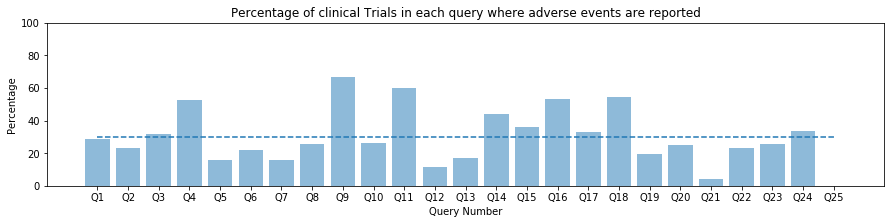

<Figure size 432x288 with 0 Axes>

In [20]:
plotAdverseEventsEmptyValues(per_nan_val)